In [2]:
# Mount Google Drive and set path
from google.colab import drive
drive.mount('/content/drive')

import os
import sys

# Navigate to your notebook directory
os.chdir('/content/drive/MyDrive/Colab Notebooks')
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

print("Current directory:", os.getcwd())
print("Files available:")
!ls

Mounted at /content/drive
Current directory: /content/drive/MyDrive/Colab Notebooks
Files available:
 01_Prerequisites.ipynb			 Gemini_API_Client.ipynb
 02_Gemini_RAG_Client_with_FAISS.ipynb	 Gemini_API_Client_with_FloTorch.ipynb
'3M_2015_10K (1).pdf'			 Images
 3M_2015_10K.pdf			 __pycache__
 CNNS_demo.ipynb			 Untitled0.ipynb
 flotorch_console.jpeg			 utils
 FloTorch_RAG_PDF_Colab.ipynb		 utils.py


# Step: 1 **Setting up a Gemini Key**

 - Check if you already have a key and it is working

In [16]:
import os
import requests
from getpass import getpass

def validate_api_key(api_key):
    try:
        response = requests.get("https://generativelanguage.googleapis.com/v1/models",
                               headers={"Content-Type": "application/json"},
                               params={"key": api_key})
        response.raise_for_status()
        return True
    except:
        return False

# Check existing key
api_key = getpass("Enter your Gemini API key (if you have one): ")

if api_key and validate_api_key(api_key):
    os.environ["GEMINI_API_KEY"] = api_key
    print("✅ Valid key saved! You're ready to use Gemini API. Go to Step 2 to create your free FloTorch account.")
else:
    print("❌ Invalid/missing key.")
    print("🔑 Please create your API key by following the steps below and run this cell again.")

Enter your Gemini API key (if you have one): ··········
❌ Invalid/missing key.
🔑 Please create your API key by following the steps below and run this cell again.


**Obtain your Gemini API Key**
 - Go to the link: https://ai.google.dev/gemini-api/docs/pricing
 - Click on the "Get started for free"
 - Sign in with your gmail account (If needed)

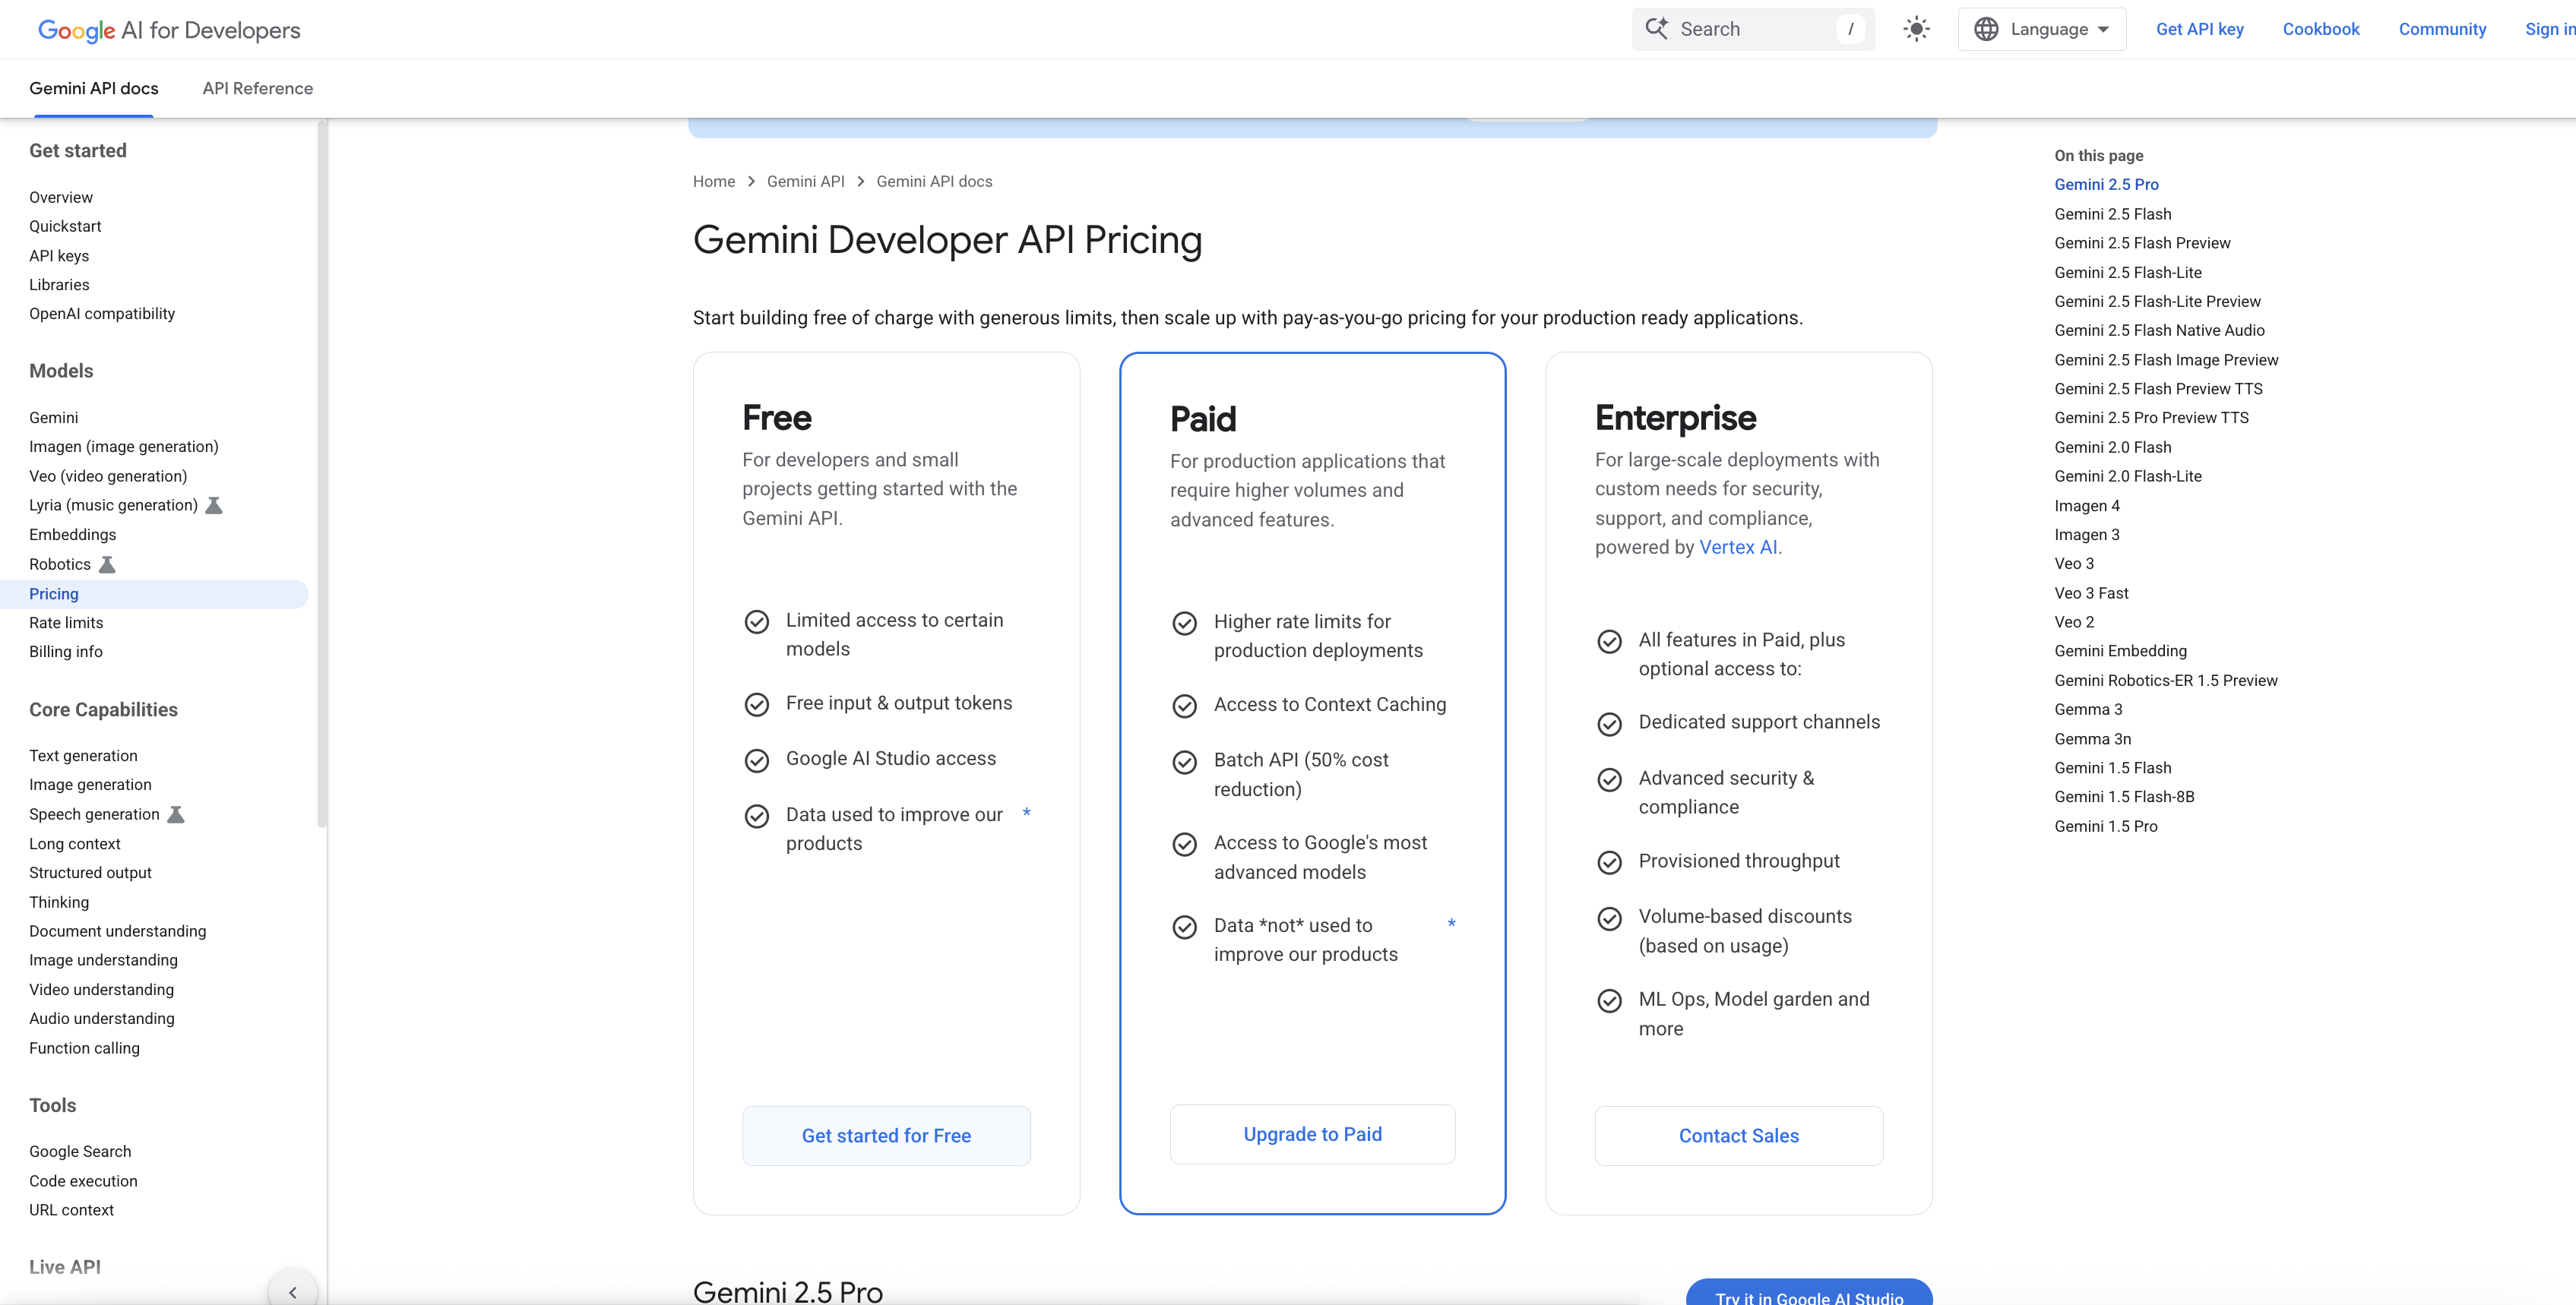

 - Click on 'Get API key' on your left bottom

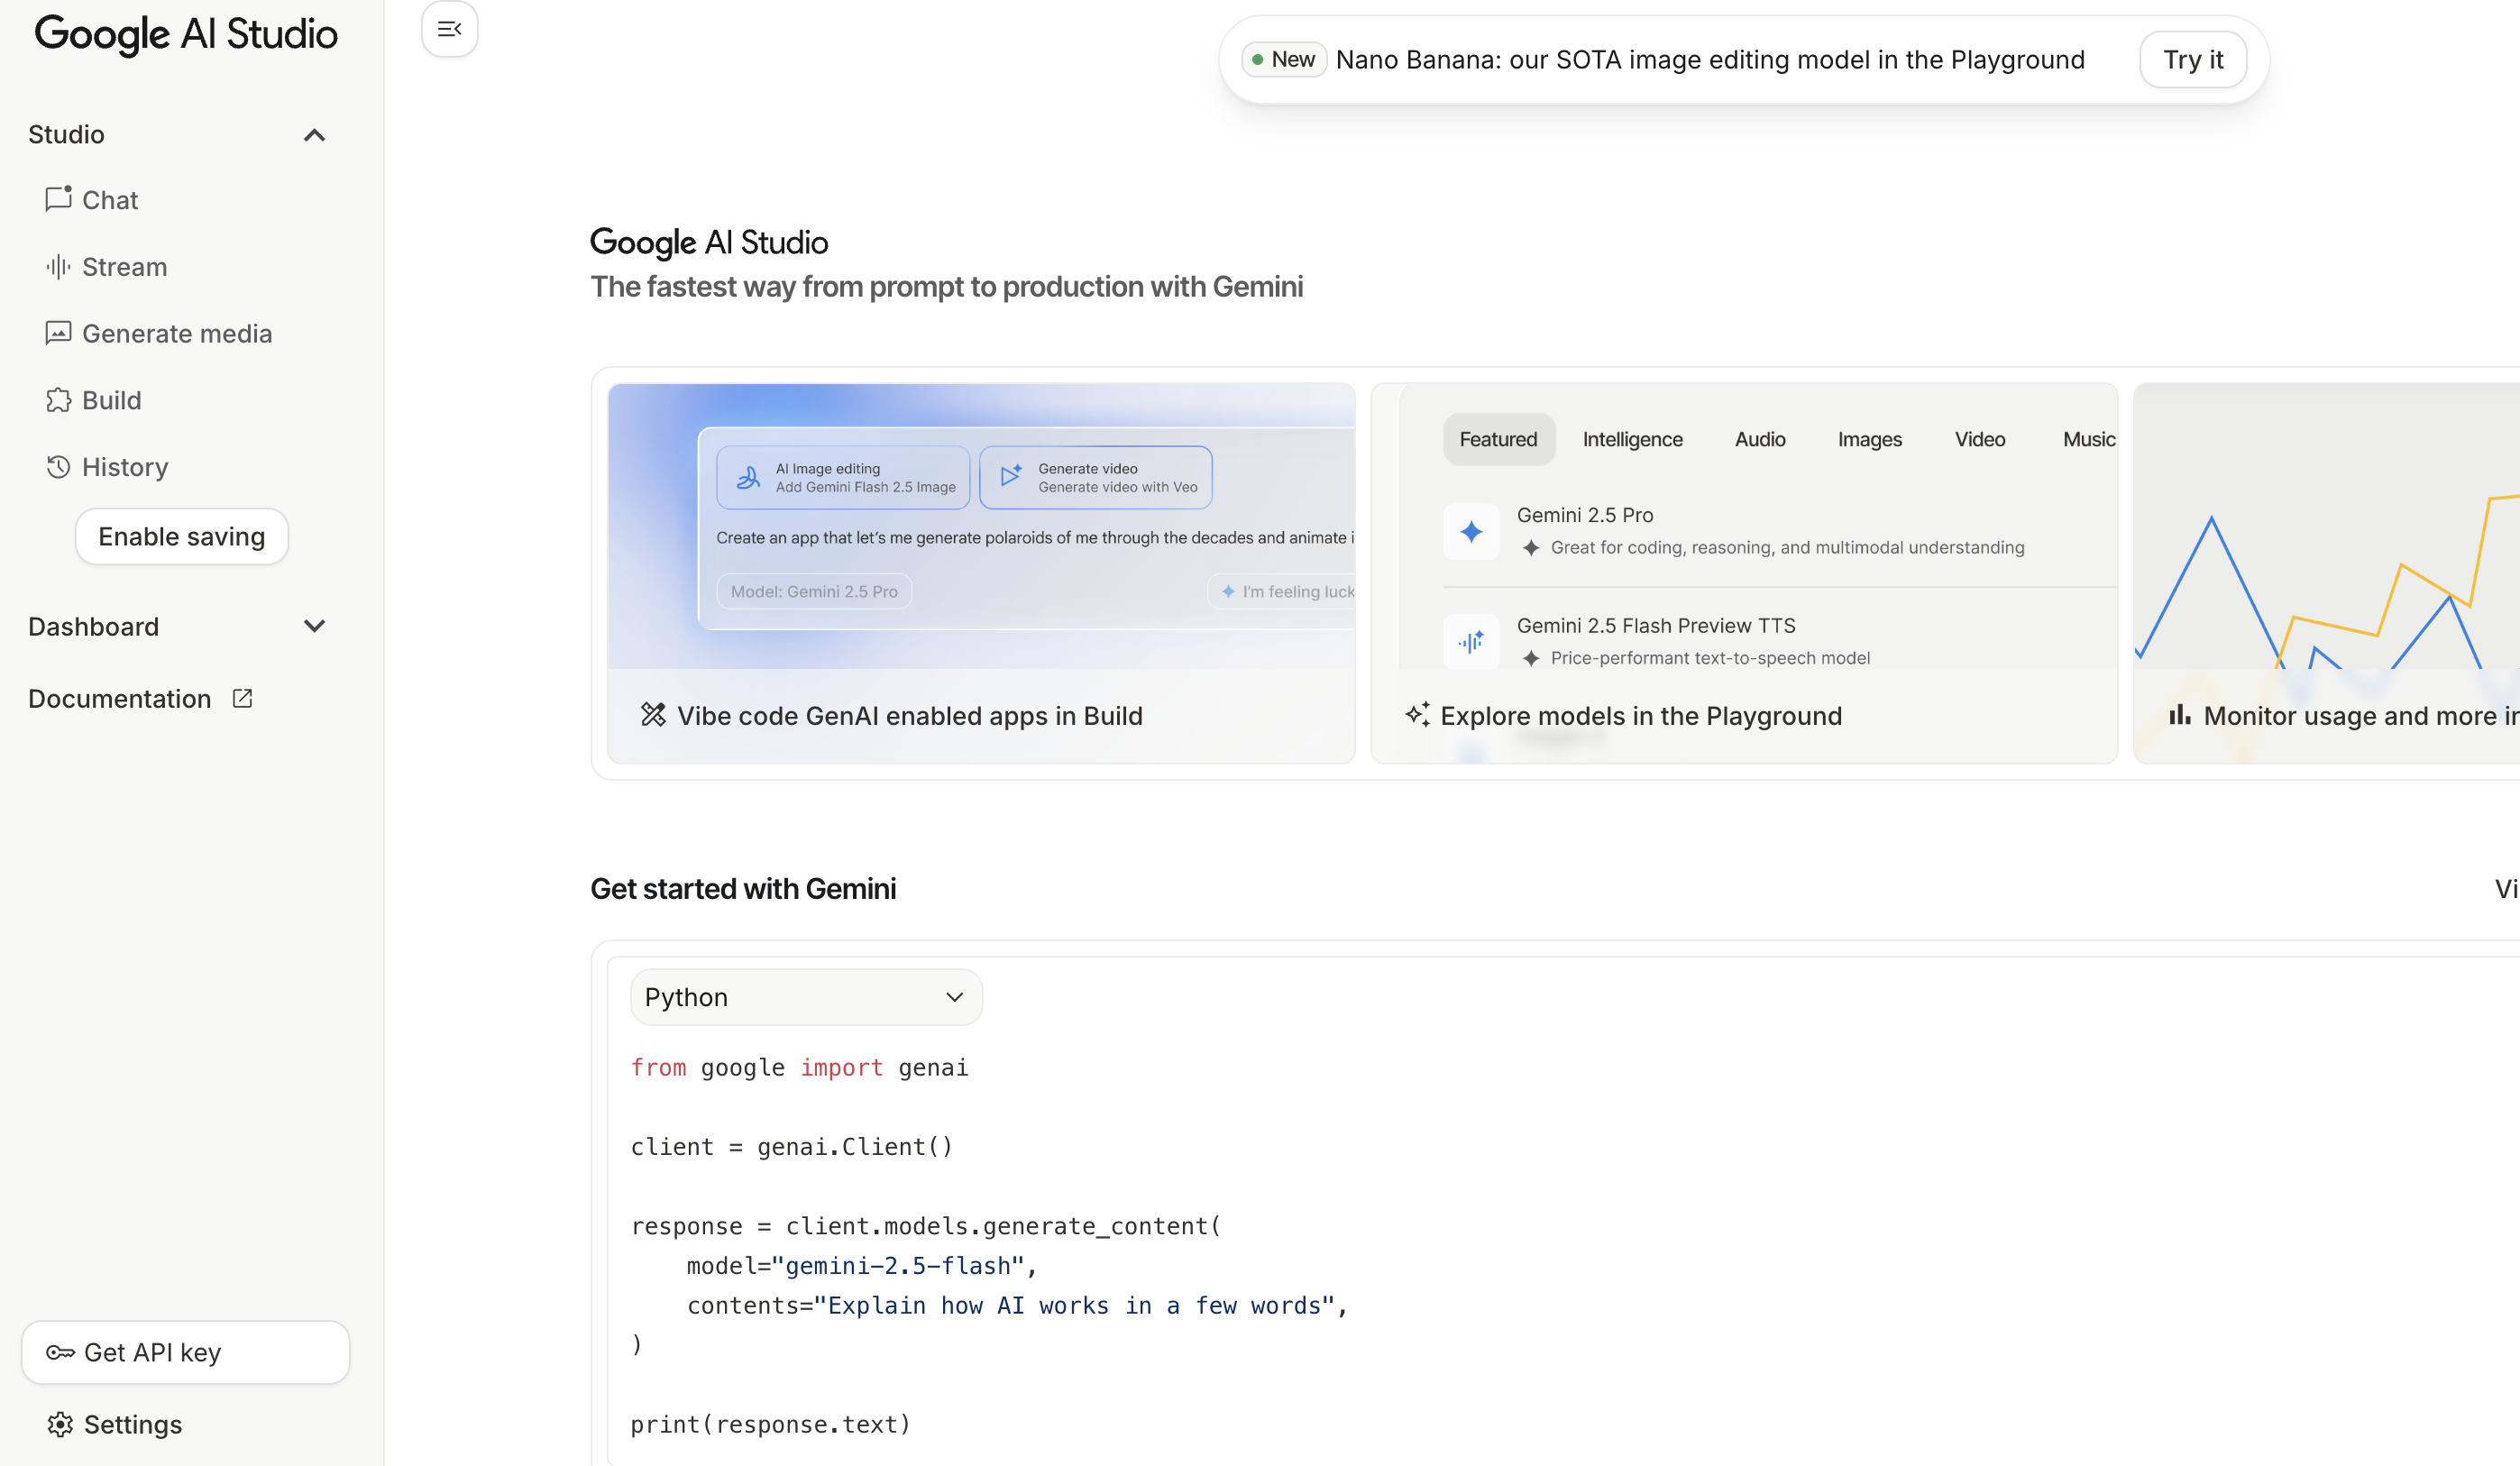

 - Click on 'Create API Key' on your right top

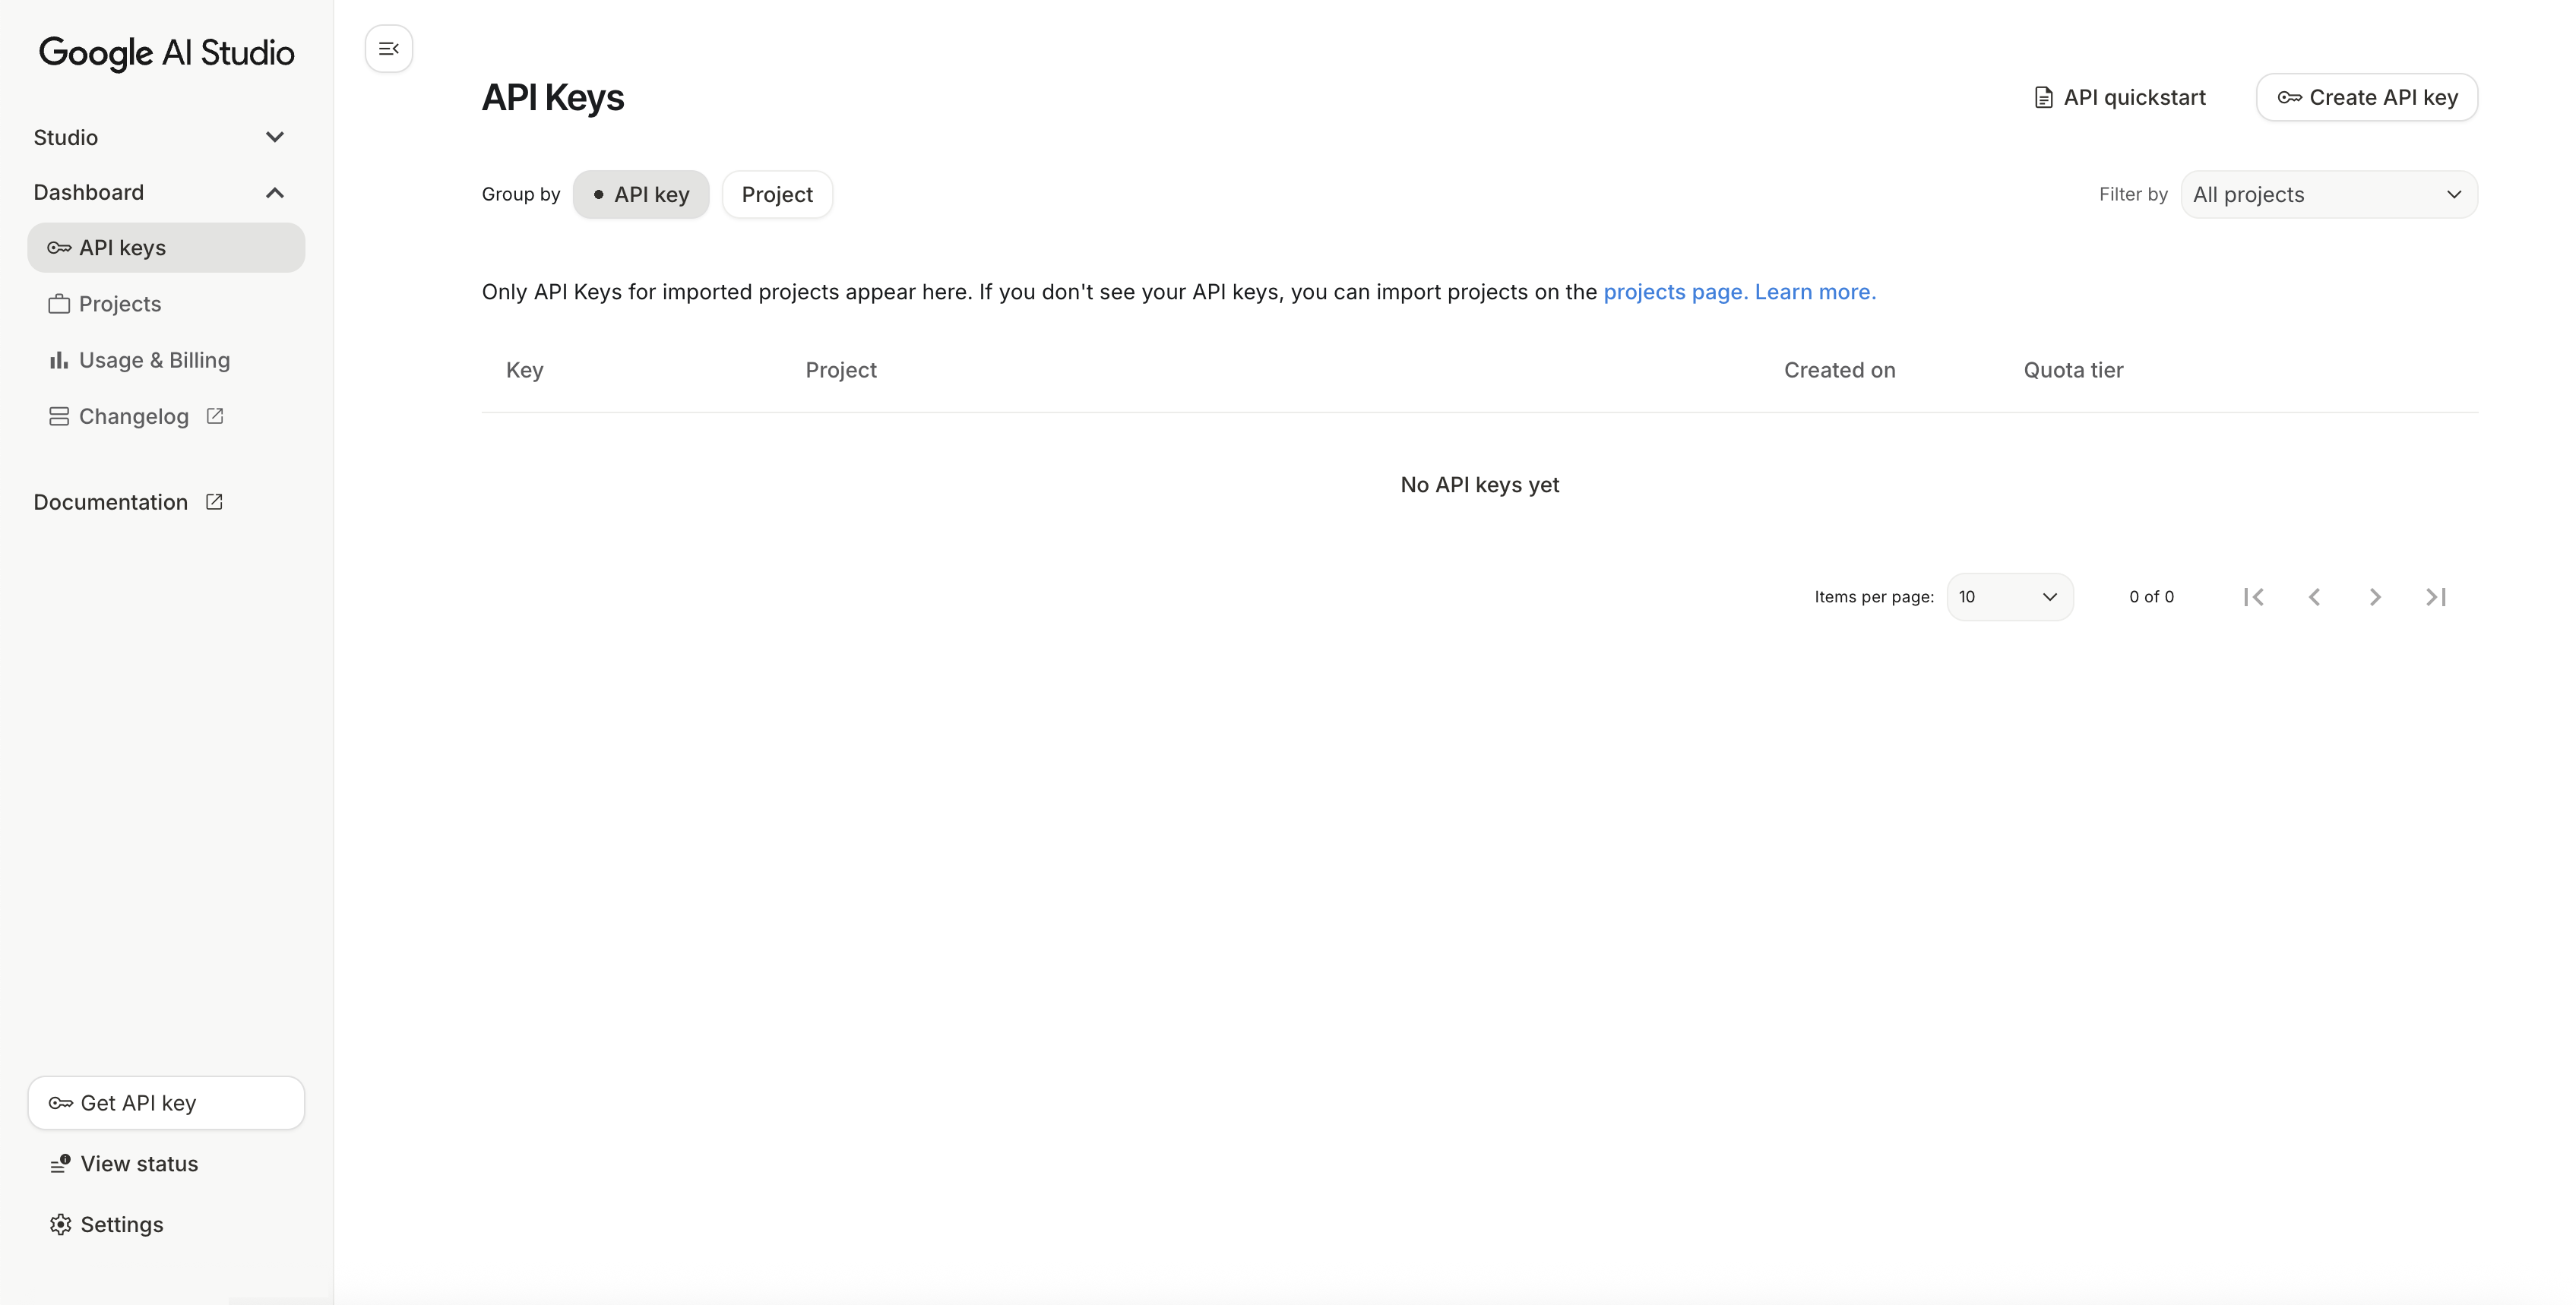

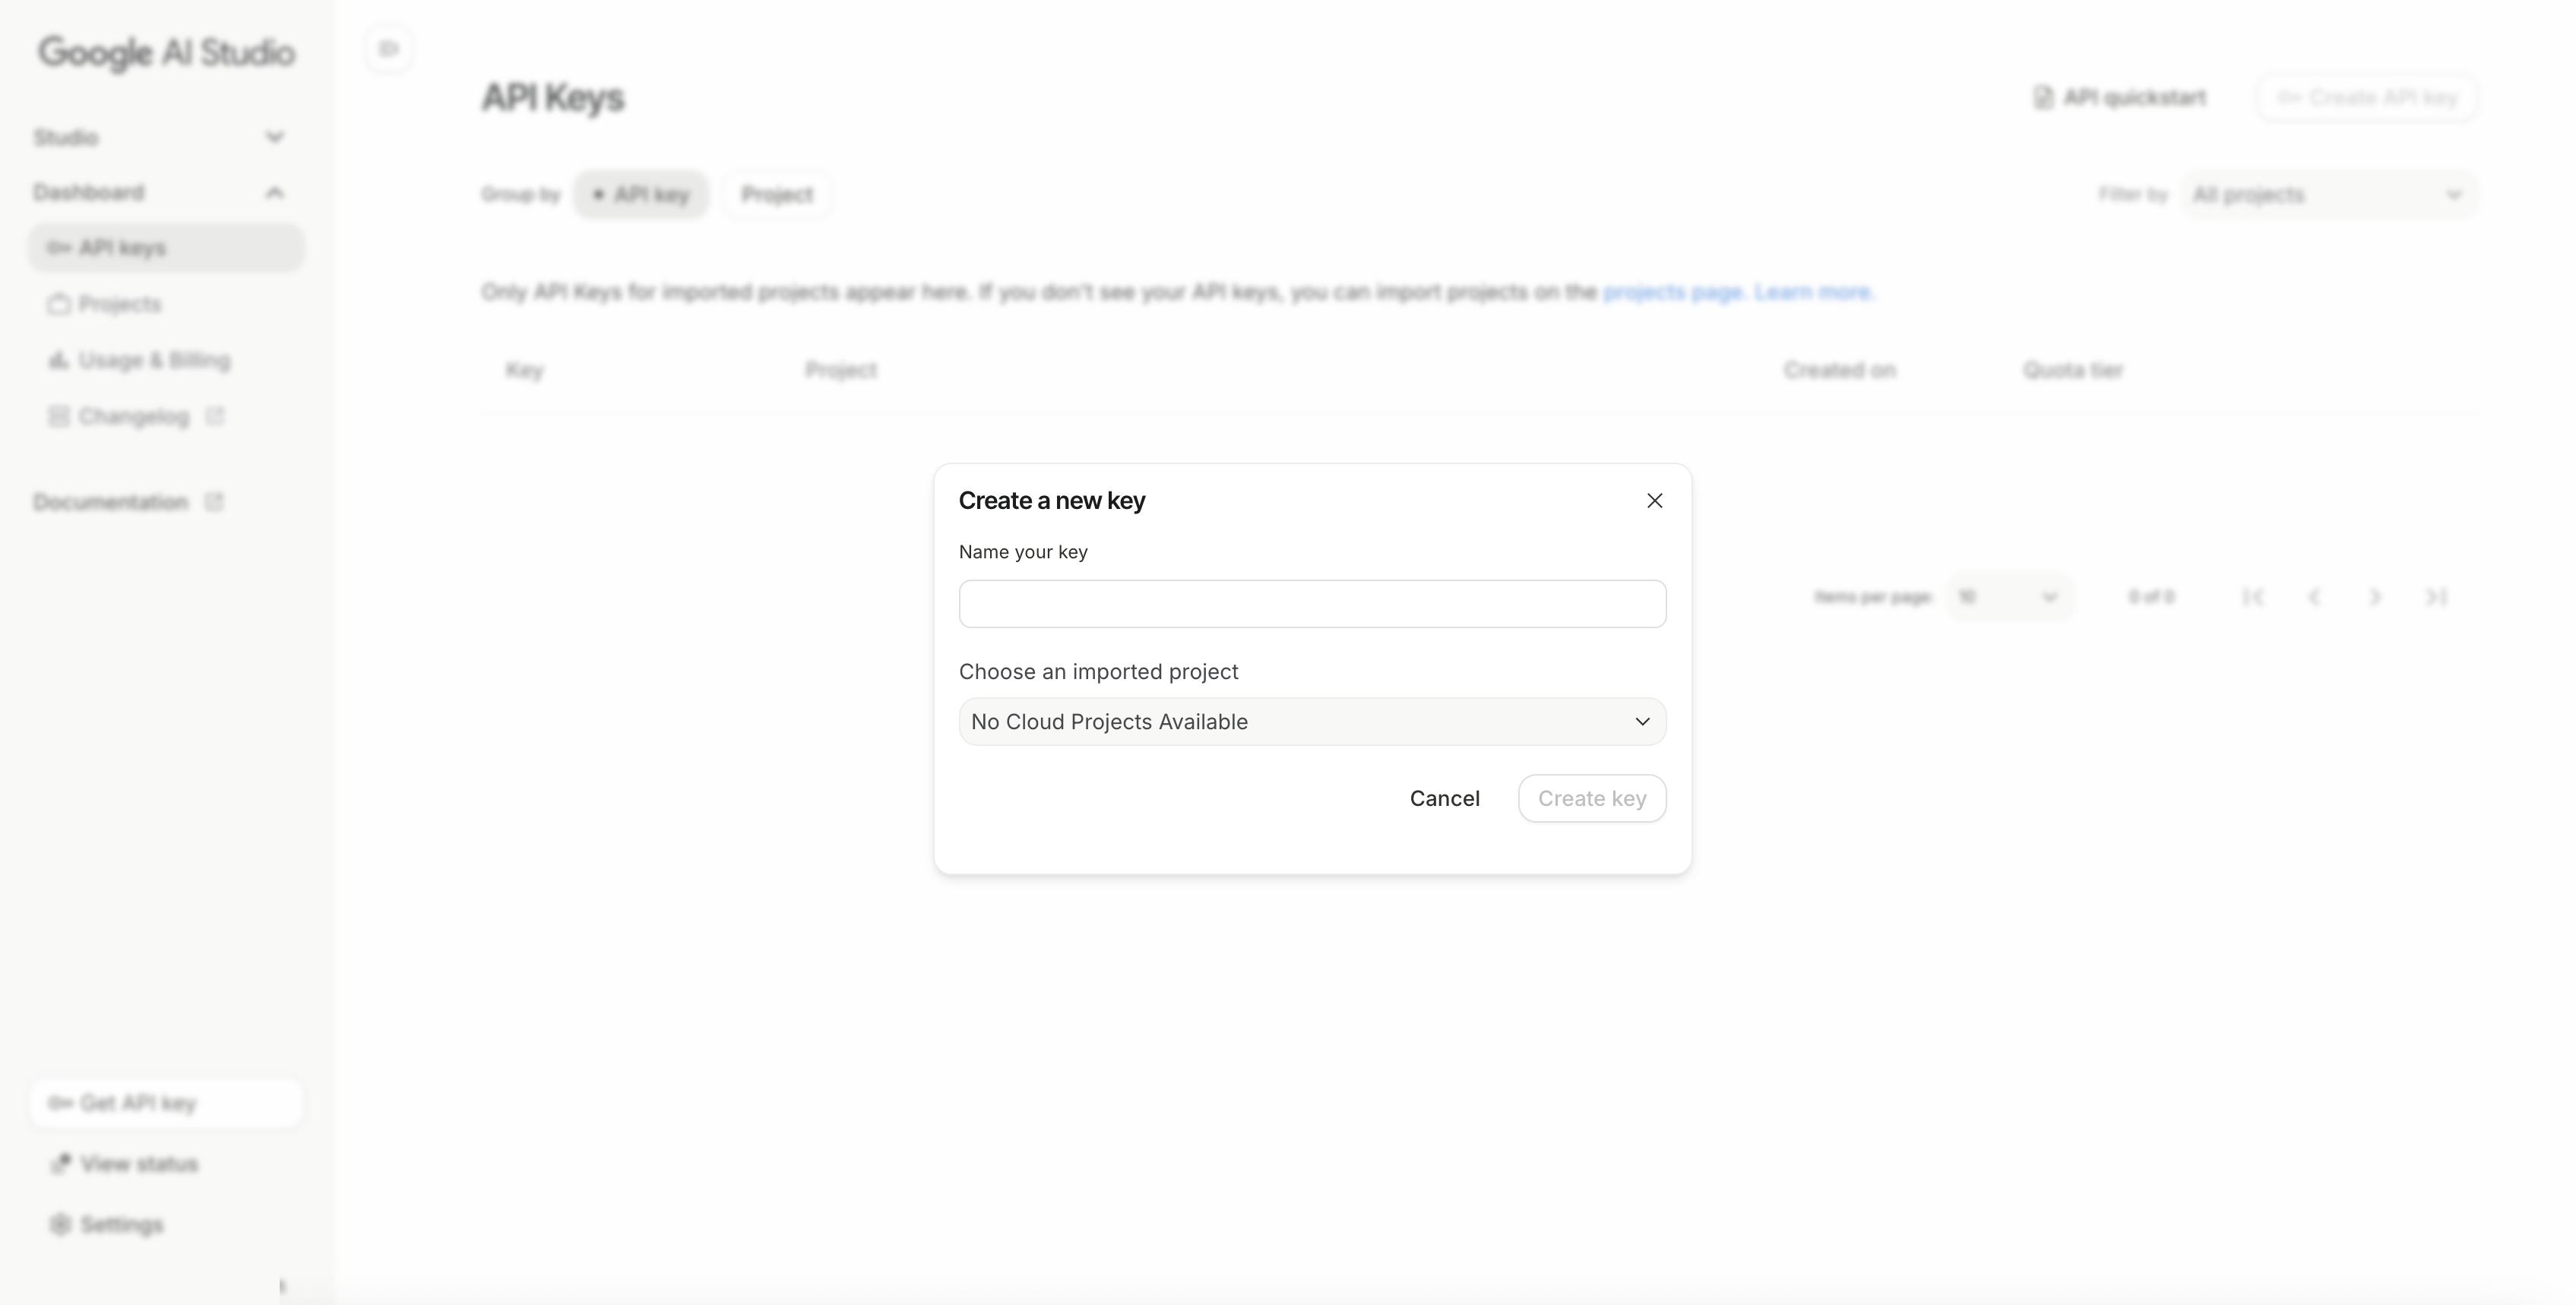

 - Click on the drop down
 - Click on "Create project"
 - Name the project "FloTorch Project"

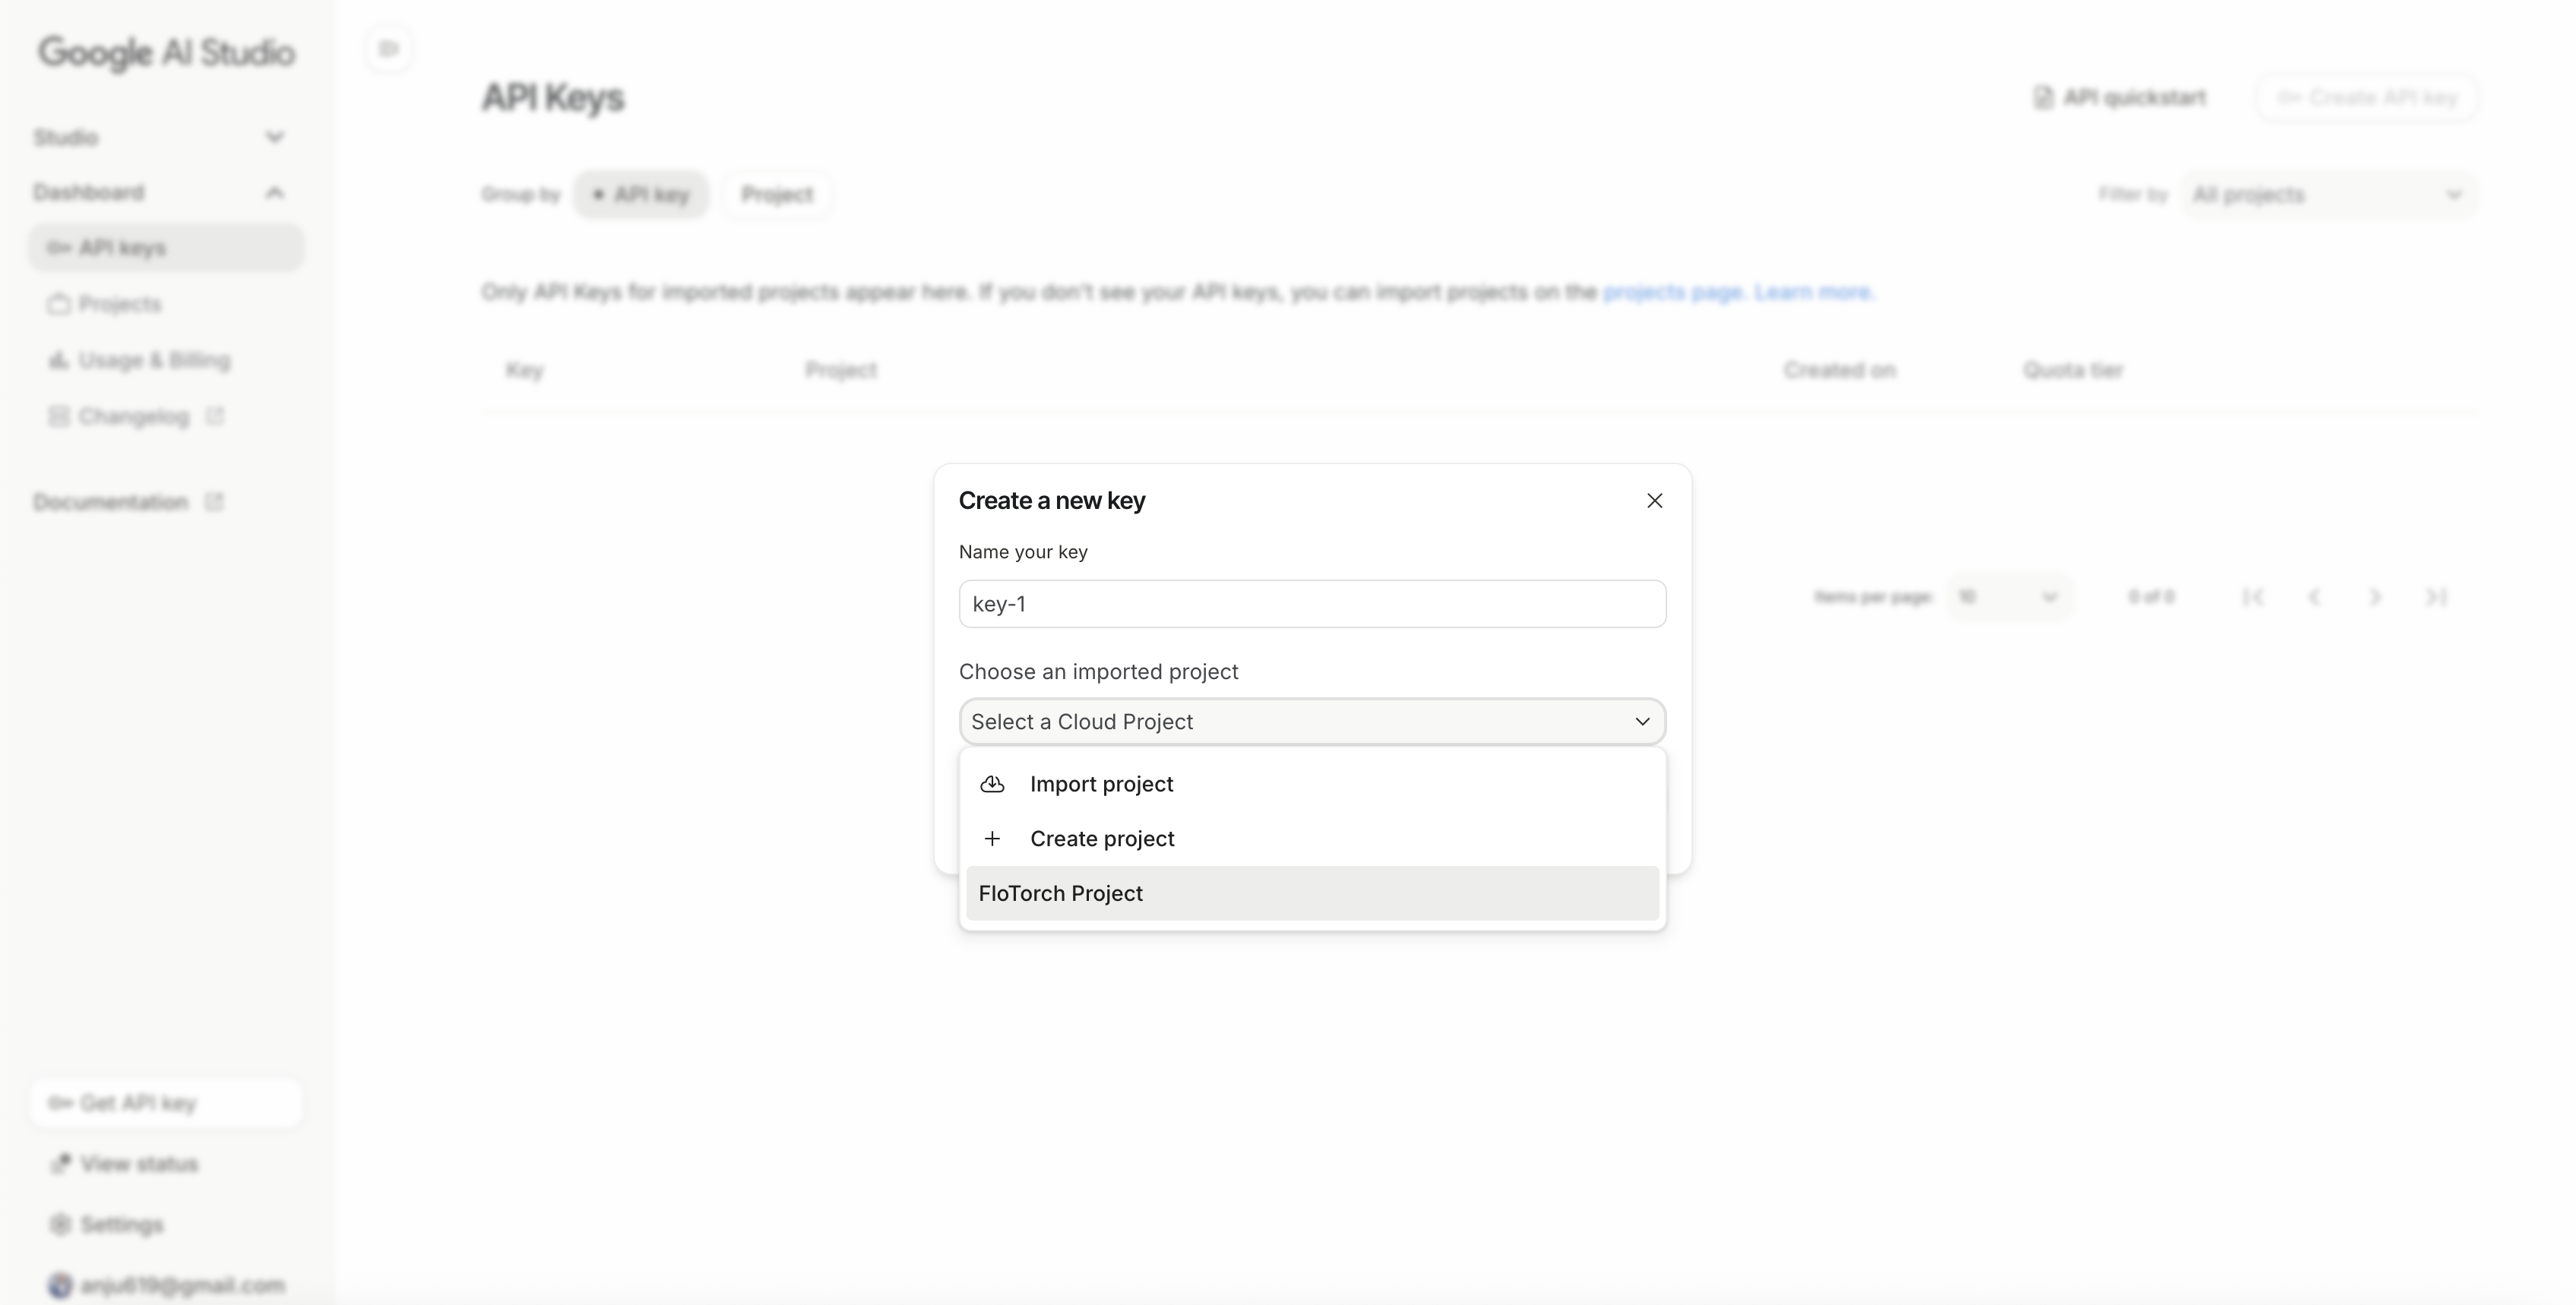

 - Now you should be able to see the Api key as shown in below screenshot

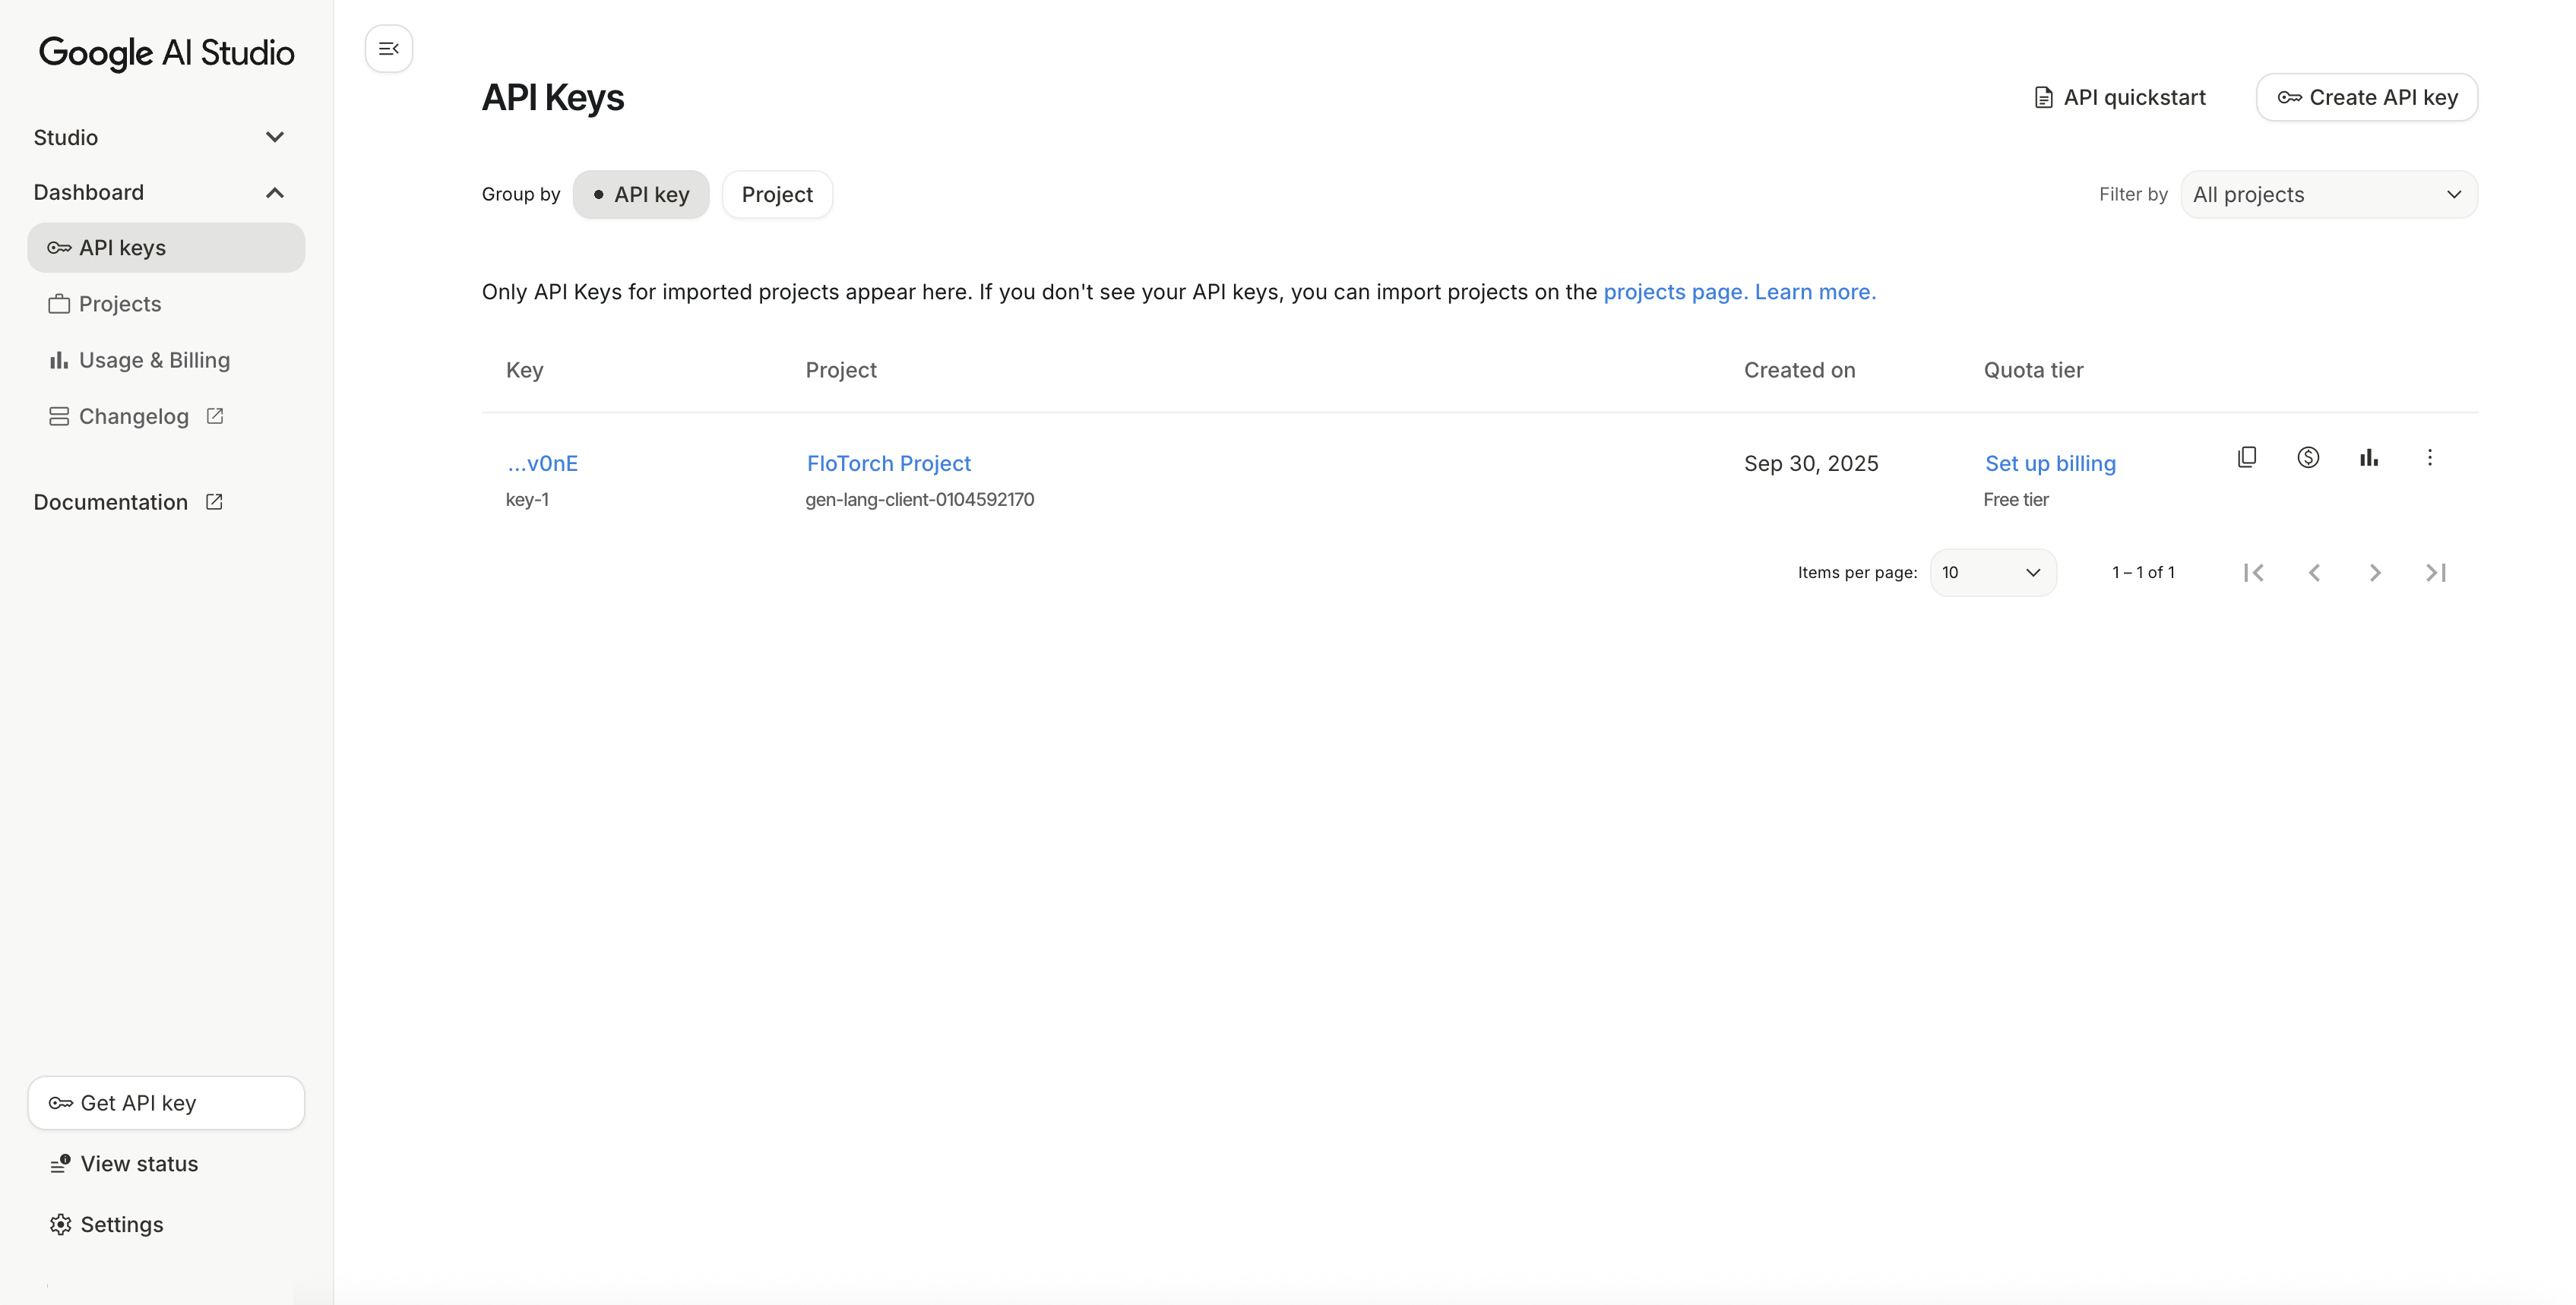

# Step 2:  **Create free Flotorch.ai Account**

In [4]:

!pip3 install flotorch

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 86 kB 2.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [5]:
import os
from getpass import getpass
from flotorch.sdk.llm import FlotorchLLM
print("✅ All libraries imported successfully!")
# FloTorch configuration
FLOTORCH_ENDPOINT = "https://gateway.flotorch.cloud"
FLOTORCH_MODEL = "flotorch/model9"

# Check existing FloTorch key
flotorch_api_key = getpass("Enter your FloTorch API key: ")

if flotorch_api_key.strip():  # Just check if key is provided
    os.environ["FLOTORCH_API_KEY"] = flotorch_api_key
    print("✅ FloTorch API key saved!")
    print(f"🌐 Using endpoint: {FLOTORCH_ENDPOINT}")
    print(f"🤖 Using model: {FLOTORCH_MODEL}")
else:
    print("❌ No FloTorch key provided.")
    print("🔑 Please enter your FloTorch API key and run this cell again.")

def call_flotorch_api(base_url: str, model_name: str, api_key: str, prompt: str) -> tuple:
    """Call Flotorch-monitored LLM API and return response with metadata."""

    messages = [{"role": "user", "content": prompt}]
    model = FlotorchLLM(model_id=model_name, api_key=api_key, base_url=base_url)

    try:
        print(f"🔄 Calling Flotorch API...")
        response = model.invoke(messages)
        generated_text = response.content

        # Extract metadata for monitoring
        tokens_used = response.metadata.get('totalTokens', 'N/A')

        print(f"📊 Tokens used: {tokens_used}")
        print(f"✅ Response received successfully")

        return generated_text, tokens_used

    except Exception as e:
        print(f"❌ API Error: {e}")
        return "", 0

✅ All libraries imported successfully!


Enter your FloTorch API key:  ········


✅ FloTorch API key saved!
🌐 Using endpoint: https://gateway.flotorch.cloud
🤖 Using model: flotorch/model9
